#Week 1 Lab: Machine Learning in Python

In this example, we will generate some simulated data, fit logistic regression and random forest models, and evaluate the performance of the models

Examples from: https://scikit-learn.org/stable/documentation.html

Kun-Hsing Yu

March 11, 2023

## Part 1. Simulate a dataset and train a logistic regression model

In [3]:
# import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix

In [47]:
# generate simulated data
n_train = 2000
n_test = 500
n_classes = 2
X, y = make_classification(n_samples=n_train+n_test, n_features=10,
                           n_classes=n_classes,
                           n_informative=2, n_redundant=0,
                           random_state=1, shuffle=True)
X_train = X[0:n_train,:]
y_train = y[0:n_train]
X_test = X[n_train:(n_train+n_test),:]
y_test = y[n_train:(n_train+n_test)]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 10)
(2000,)
(500, 10)
(500,)


In [48]:
# fit the logistic regression model
# note that only the training data X_train and y_train should be used in the training process
clf_lr = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [49]:
# get prediction
y_predicted = clf_lr.predict(X_test)


## Quiz Question 1
How to get the predicted probability for each sample in the validation set?

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba


In [50]:
# Your codes here
############################################################
y_predicted_estimates_linear=clf_lr.predict_proba(X_test)
y_predicted_estimates_log=clf_lr.predict_log_proba(X_test)


##Quiz Question 2

Generate the confusion matrix.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [65]:
from numpy.ma.core import size
# Your codes here
############################################################
confusion_matrix(y_test,y_predicted)

array([[227,  18],
       [ 31, 224]])

##Quiz Question 3

Obtain the betas and intercept.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [74]:
# Your codes here
############################################################

params=clf_lr.get_params(deep=True)

intercept=clf_lr.intercept_

coef=clf_lr.coef_

## Part 2. Train a random forest model

In [76]:
# load the package
from sklearn.ensemble import RandomForestClassifier

## Quiz Question 4

Define and fit a random forest model.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [97]:
# Your codes here
clf_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

############################################################


In [102]:
# get prediction
y_predicted = clf_rf.predict(X_test)

500

In [101]:
# get predicted probability
y_score = clf_rf.predict_proba(X_test)

1000

In [81]:
# generate the confusion matrix (from quiz question 2)
confusion_matrix(y_test,y_predicted)
############################################################


array([[228,  17],
       [ 24, 231]])

## Quiz Question 5
Obtain the feature importance.

In [82]:
# Your codes here
clf_rf.feature_importances_
############################################################


array([0.02899487, 0.02935671, 0.02631522, 0.0292122 , 0.02741886,
       0.02734553, 0.08075576, 0.0275012 , 0.03012055, 0.69297909])

## Quiz Question 6

Generate the ROC curve.

Hint: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

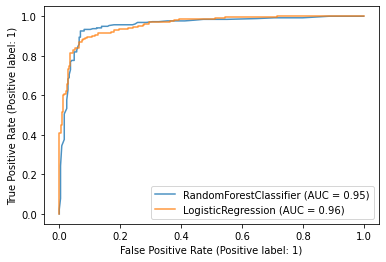

In [114]:
#from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
# Your codes here
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax, alpha=0.8)
lr_disp = RocCurveDisplay.from_estimator(clf_lr, X_test, y_test, ax=ax, alpha=0.8)
plt.show()
############################################################

